In [14]:
filling_time = int(input('Время заполнения шприца: '))
injection_time = int(input('Время инъекции: '))
transfer_time = int(input('Время передачи шприца: '))
time = int(input('Остаточное время жизни наркоманов: '))

filling_symbol = 'f'
transfer_symbol = 't'
injection_symbol = 'i'
waiting_symbol = '-'


class Addict:
    def __init__(self):
        self.time = []


first_addict = Addict()
second_addict = Addict()

filling_flag = False
transfer_flag = False
injection_flag = False

first_filling = 0
first_injection = 0
transfer_iter = 0

first_round = filling_time + transfer_time
subsequent_rounds = max(filling_time, injection_time) + transfer_time

subsequent_steps = time - first_round

for i in range(min(first_round, time)):
    if i < filling_time:
        first_addict.time.append(filling_symbol)
        second_addict.time.append(waiting_symbol)
    else:
        first_addict.time.append(transfer_symbol)
        second_addict.time.append(transfer_symbol)

rounds = 0
first_ratio = 1 if min(first_round, time) == first_round else 0

x = []
y = []

if subsequent_steps > 0:
    for i in range(subsequent_steps):
        if not transfer_flag:
            if not filling_flag and not injection_flag:
                filling_flag = True
                first_filling = i
                first_addict.time.append(filling_symbol)
                injection_flag = True
                first_injection = i
                second_addict.time.append(injection_symbol)
            elif filling_flag and injection_flag:
                if i - first_filling < filling_time:
                    first_addict.time.append(filling_symbol)
                else:
                    filling_flag = False
                    transfer_flag = not injection_flag

                if i - first_injection < injection_time:
                    second_addict.time.append(injection_symbol)
                else:
                    injection_flag = False
                    transfer_flag = not filling_flag
            elif filling_flag and not injection_flag:
                if i - first_filling < filling_time:
                    first_addict.time.append(filling_symbol)
                else:
                    filling_flag = False
                    transfer_flag = not injection_flag
                second_addict.time.append(waiting_symbol)
            else:
                if i - first_injection < injection_time:
                    second_addict.time.append(injection_symbol)
                else:
                    injection_flag = False
                    transfer_flag = not filling_flag
                first_addict.time.append(waiting_symbol)
        else:
            if transfer_iter < transfer_time - 1:
                transfer_iter += 1
            else:
                transfer_iter = 0
                transfer_flag = False
                rounds += 1
            first_addict.time.append(transfer_symbol)
            second_addict.time.append(transfer_symbol)
            
        average_time = int(((first_ratio * first_round + rounds * subsequent_rounds) / (rounds + 1)) * 100) / 100
        x.append(i)
        y.append(average_time)



def try_float_to_int(value):
    if value - int(value) == 0:
        return int(value)
    else:
        return value


average_time = try_float_to_int(average_time)

output = input('Вывести жизнь наркоманов? [да/нет] ')

if output == 'да':

    print("""
    'f' - заполнение шприца
    'i' - процесс инъекции
    't' - передача шприца
    '-' - ожидание
    """)

    print('Первый наркоман: Второй наркоман:')
    for i in range(len(second_addict.time)):
        print(first_addict.time[i], second_addict.time[i])
print()
print('Среднее время круга:', average_time)


Время заполнения шприца: 7
Время инъекции: 9
Время передачи шприца: 5
Остаточное время жизни наркоманов: 5000
Вывести жизнь наркоманов? [да/нет] нет

Среднее время круга: 13.99


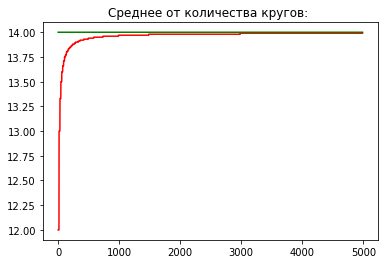

In [15]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.title("Среднее от количества кругов: ")
plt.plot(x, y, color = 'red')
for i in range(len(x)): y[i] = subsequent_rounds
plt.plot(x, y, color = 'green')